In [4]:
import tensorflow as tf
import cv2
import numpy as np
from glob import glob
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout, Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model



ModuleNotFoundError: No module named 'tensorflow'

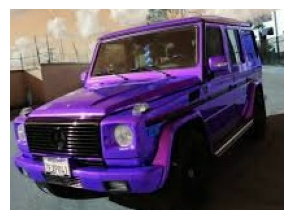

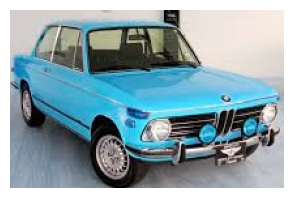

In [2]:
cars_train=glob("car/train/**/**")
for i in range(2):
    car1=random.choice(cars_train)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(car1));plt.axis('off')

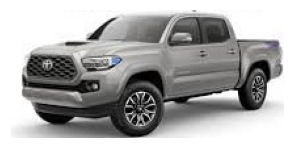

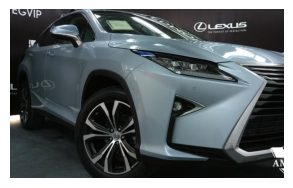

In [3]:
cars_test=glob("car/test/**/**")
for i in range(2):
    car=random.choice(cars_test)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(car));plt.axis('off')

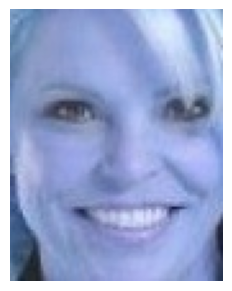

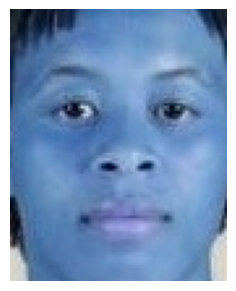

In [4]:
images_train=glob("pedestrian/Training/**/**")
for i in range(2):
    image=random.choice(images_train)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

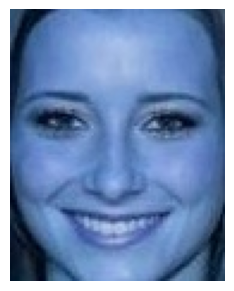

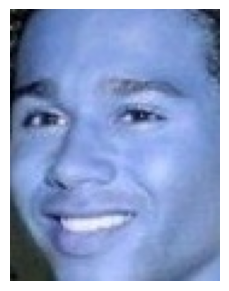

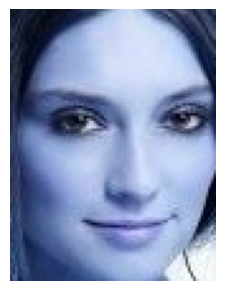

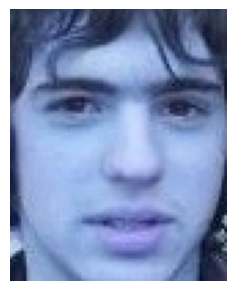

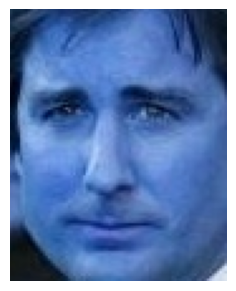

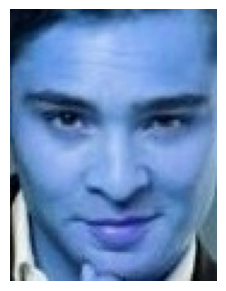

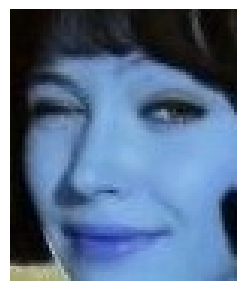

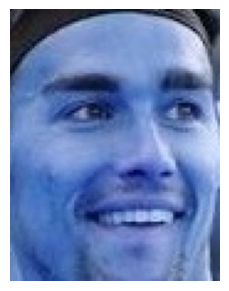

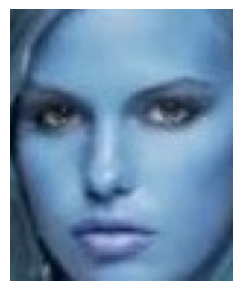

In [5]:
images_val=glob("pedestrian/Validation/**/**")
for i in range(9):
    image1=random.choice(images_val)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image1));plt.axis('off')

In [6]:
# Car color prediction model
car_color_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15, activation='softmax')  
])

C:\Users\sweta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
car_color_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
img_size=48
batch_size=64
datagen_train= ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("car/train/",
                                            target_size = (img_size,img_size),
                                            color_mode = "grayscale",
                                            batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)

datagen_validation= ImageDataGenerator()
validation_generator= datagen_train.flow_from_directory("car/test/",
                                            target_size = (img_size,img_size),
                                            color_mode = "grayscale",
                                            batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)

Found 7267 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [9]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("car_color_model.weights.h5", monitor = 'val_accuracy',
                             save_weights_only = True,mode = 'max', verbose = 1)
callbacks = [checkpoint]


In [10]:
history = car_color_model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15


C:\Users\sweta\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.0966 - loss: 250.9630
Epoch 1: saving model to car_color_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 49s 395ms/step - accuracy: 0.0968 - loss: 248.5267 - val_accuracy: 0.1165 - val_loss: 6.5337
Epoch 2/15
  1/113 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1562 - loss: 5.8733
Epoch 2: saving model to car_color_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1562 - loss: 5.8733 - val_accuracy: 0.0500 - val_loss: 8.5029
Epoch 3/15


C:\Users\sweta\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.2120 - loss: 4.5211
Epoch 3: saving model to car_color_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 371ms/step - accuracy: 0.2121 - loss: 4.5156 - val_accuracy: 0.1335 - val_loss: 4.7812
Epoch 4/15
  1/113 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2188 - loss: 3.5596
Epoch 4: saving model to car_color_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2188 - loss: 3.5596 - val_accuracy: 0.1500 - val_loss: 4.5481
Epoch 5/15
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.4298 - loss: 2.1418
Epoch 5: saving model to car_color_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 368ms/step - accuracy: 0.4297 - loss: 2.1413 - val_accuracy: 0.1523 - val_loss: 4.4372
Epoch 6/15
  1/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4062 - loss: 2.2839
Epoch 6: saving model to car_color_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 2.2839 - val_accuracy: 0.150

In [11]:
car_color_model.evaluate(validation_generator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.1840 - loss: 5.6516


[5.669303894042969, 0.18958869576454163]

In [12]:
# Car counting model
car_count_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15, activation='linear') 
])

In [13]:
img_size=48
batch_size=64
datagen_train= ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("car/train/",
                                            target_size = (img_size,img_size),
                                            color_mode = "grayscale",
                                            batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)

datagen_validation= ImageDataGenerator()
validation_generator= datagen_train.flow_from_directory("car/test/",
                                            target_size = (img_size,img_size),
                                            color_mode = "grayscale",
                                            batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)

Found 7267 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [14]:
car_count_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("car_count_model.weights.h5", monitor = 'val_accuracy',
                             save_weights_only = True,mode = 'max', verbose = 1)
callbacks = [checkpoint]


In [16]:
history = car_count_model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.0808 - loss: 6.8042
Epoch 1: saving model to car_count_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 385ms/step - accuracy: 0.0809 - loss: 6.8241 - val_accuracy: 0.0859 - val_loss: 8.0590
Epoch 2/15
  1/113 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.0938 - loss: 8.5627
Epoch 2: saving model to car_count_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0938 - loss: 8.5627 - val_accuracy: 0.2000 - val_loss: 8.0590
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.0902 - loss: 8.0550
Epoch 3: saving model to car_count_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 377ms/step - accuracy: 0.0902 - loss: 8.0553 - val_accuracy: 0.0879 - val_loss: 8.1115
Epoch 4/15
  1/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.0781 - loss: 7.0517
Epoch 4: saving model to car_count_model.weights.h5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0781 - loss: 7.0517 - val_accu

In [17]:
car_count_model.evaluate(validation_generator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.0830 - loss: 7.8851


[8.069406509399414, 0.08740359544754028]

In [18]:
# Gender prediction model
gender_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  
])

In [19]:
img_size=48
batch_size=64
datagen_train= ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("pedestrian/Training/",
                                            target_size = (img_size,img_size),
                                            color_mode = "grayscale",
                                            batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)

datagen_validation= ImageDataGenerator()
validation_generator= datagen_train.flow_from_directory("pedestrian/Validation/",
                                            target_size = (img_size,img_size),
                                            color_mode = "grayscale",
                                            batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [20]:
gender_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
epochs =15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
checkpoint = ModelCheckpoint("gender_model.weights.h5", monitor = 'val_accuracy',
                             save_weights_only = True,mode = 'max', verbose =1 )
callbacks = [checkpoint]


In [22]:
history = gender_model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7544 - loss: 12.3579
Epoch 1: saving model to gender_model.weights.h5
734/734 ━━━━━━━━━━━━━━━━━━━━ 109s 145ms/step - accuracy: 0.7545 - loss: 12.3454 - val_accuracy: 0.8683 - val_loss: 0.4037
Epoch 2/15
  1/734 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.8906 - loss: 0.3212
Epoch 2: saving model to gender_model.weights.h5
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.8906 - loss: 0.3212 - val_accuracy: 1.0000 - val_loss: 2.2888e-05
Epoch 3/15
732/734 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8879 - loss: 0.3348
Epoch 3: saving model to gender_model.weights.h5
734/734 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.8879 - loss: 0.3347 - val_accuracy: 0.8767 - val_loss: 0.3711
Epoch 4/15
  1/734 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9062 - loss: 0.2737
Epoch 4: saving model to gender_model.weights.h5
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.9062 - loss: 0.2737 - val_accur

In [23]:
gender_model.evaluate(validation_generator)

183/183 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.8776 - loss: 0.4151


[0.44371408224105835, 0.8712335824966431]

In [24]:
model_json = car_color_model.to_json()
with open("car_color_model.json", "w") as json_file:
    json_file.write(model_json)